# Bootcamp Sesi√≥n 1 
### Descarga datos | IQR y Outliers | Filtro de Kalman
Septiembre 2024


In [1]:
import requests 
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
load_dotenv()
%matplotlib inline

## Seleccionar mercado de FX

API_KEY = os.environ['FMP']

#### Tema 1: Descarga de Datos Intrad√≠a

In [2]:
r = requests.get(f'https://financialmodelingprep.com/api/v3/historical-chart/5min/EURUSD?from=2024-09-01&to=2024-09-23&apikey={API_KEY}')

In [3]:
values = r.json()

In [4]:
df = pd.DataFrame(values)
df = df.assign(ticker = 'EURUSD')

In [5]:
df.head()

date     open      low     high    close  volume  ticker
0  2024-09-23 23:55:00  1.11127  1.11122  1.11128  1.11125     351  EURUSD
1  2024-09-23 23:50:00  1.11127  1.11125  1.11136  1.11127     239  EURUSD
2  2024-09-23 23:45:00  1.11126  1.11115  1.11131  1.11127     311  EURUSD
3  2024-09-23 23:40:00  1.11116  1.11113  1.11126  1.11126     201  EURUSD
4  2024-09-23 23:35:00  1.11118  1.11100  1.11118  1.11116     440  EURUSD

In [6]:
df.describe()

open          low         high        close       volume
count  1743.000000  1743.000000  1743.000000  1743.000000  1743.000000
mean      1.113165     1.113007     1.113323     1.113167   836.114745
std       0.002342     0.002330     0.002351     0.002339   759.892269
min       1.107020     1.106840     1.107470     1.107020     2.000000
25%       1.111685     1.111550     1.111840     1.111685   358.000000
50%       1.112600     1.112460     1.112760     1.112600   704.000000
75%       1.115790     1.115640     1.115910     1.115790  1046.500000
max       1.118680     1.117810     1.118890     1.118680  9062.000000

In [7]:
# Ejecutar una sola vez debido al parametro inplace
df.set_index('date', inplace=True)

In [8]:
df.head()

open      low     high    close  volume  ticker
date                                                                   
2024-09-23 23:55:00  1.11127  1.11122  1.11128  1.11125     351  EURUSD
2024-09-23 23:50:00  1.11127  1.11125  1.11136  1.11127     239  EURUSD
2024-09-23 23:45:00  1.11126  1.11115  1.11131  1.11127     311  EURUSD
2024-09-23 23:40:00  1.11116  1.11113  1.11126  1.11126     201  EURUSD
2024-09-23 23:35:00  1.11118  1.11100  1.11118  1.11116     440  EURUSD

<Axes: xlabel='date'>

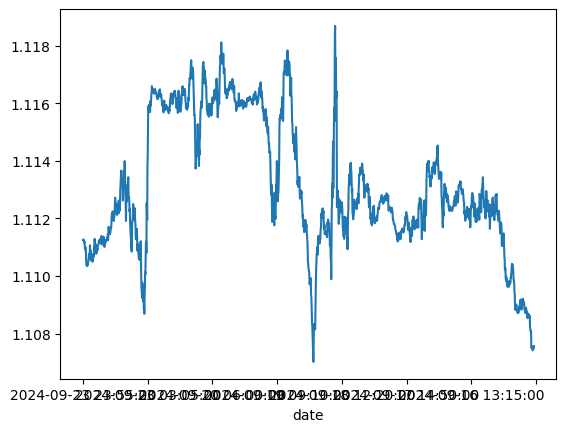

In [9]:
## Revisar serie de tiempo
df['close'].plot(kind='line')

<Axes: xlabel='date'>

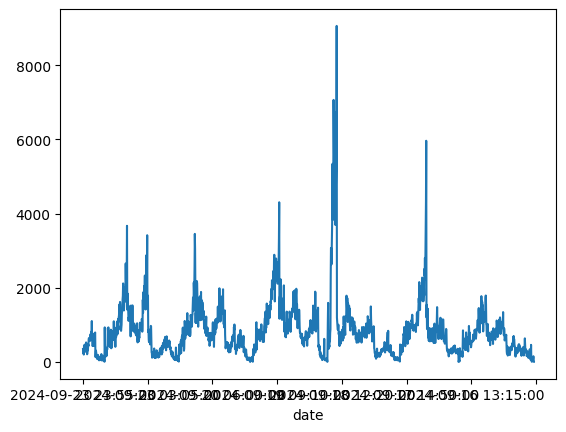

In [10]:
df['volume'].plot(kind='line')

#### Tema 2: IQR

El Rango Intercuart√≠lico (IQR) es una t√©cnica com√∫n para la detecci√≥n de outliers (valores at√≠picos) en los datos. Se basa en la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de una distribuci√≥n, y cualquier punto que est√© significativamente por encima o por debajo de este rango puede considerarse un outlier.

La f√≥rmula b√°sica para identificar outliers es:

L√≠mite¬†inferior=ùëÑ1‚àí1.5√óIQR 

L√≠mite¬†superior = ùëÑ3+1.5√óIQR 

Cualquier valor fuera de estos l√≠mites puede ser considerado un outlier.

In [11]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir los l√≠mites inferior y superior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"L√≠mite inferior: {lower_bound}")
print(f"L√≠mite superior: {upper_bound}")

# Filtrar los valores que son considerados outliers
outliers = df[(df['volume'] < lower_bound) | (df['volume'] > upper_bound)]

print("Outliers detectados:")
print(outliers)

L√≠mite inferior: -674.75
L√≠mite superior: 2079.25
Outliers detectados:
                        open      low     high    close  volume  ticker
date                                                                   
2024-09-23 11:00:00  1.11323  1.11276  1.11344  1.11276    2118  EURUSD
2024-09-23 10:10:00  1.11191  1.11185  1.11244  1.11242    2657  EURUSD
2024-09-23 10:05:00  1.11265  1.11152  1.11272  1.11191    2228  EURUSD
2024-09-23 10:00:00  1.11293  1.11256  1.11312  1.11265    2127  EURUSD
2024-09-23 09:50:00  1.11259  1.11227  1.11280  1.11272    2443  EURUSD
...                      ...      ...      ...      ...     ...     ...
2024-09-17 08:50:00  1.11208  1.11178  1.11248  1.11242    2218  EURUSD
2024-09-17 08:45:00  1.11238  1.11193  1.11265  1.11208    2846  EURUSD
2024-09-17 08:40:00  1.11212  1.11199  1.11261  1.11238    3645  EURUSD
2024-09-17 08:35:00  1.11252  1.11211  1.11299  1.11212    4333  EURUSD
2024-09-17 08:30:00  1.11336  1.11212  1.11437  1.11252    5965

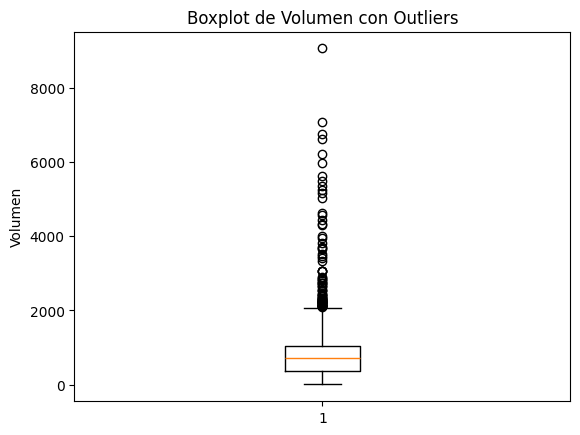

In [12]:
# Crear un boxplot para visualizar los outliers
plt.boxplot(df['volume'])

# Etiquetas y t√≠tulo
plt.title('Boxplot de Volumen con Outliers')
plt.ylabel('Volumen')
plt.show()

##### Objetivo crear un vector de anomalia ascendente

In [13]:
qz = df['volume'].quantile(0.95)
vol_high = df[df['volume'] > qz]

<Axes: xlabel='date'>

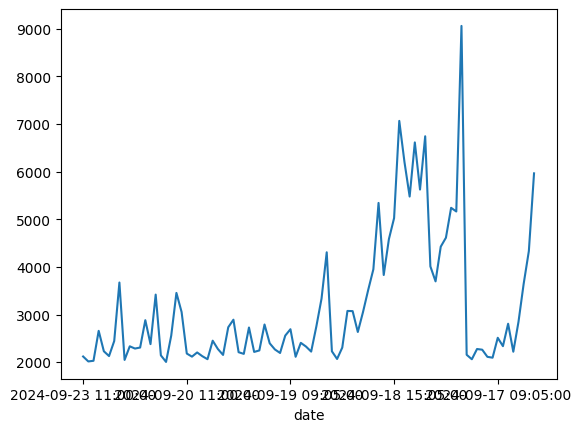

In [14]:
vol_high['volume'].plot(kind='line')

In [15]:
vol_high['volume'].head(60)

date
2024-09-23 11:00:00    2118
2024-09-23 10:35:00    2014
2024-09-23 10:15:00    2028
2024-09-23 10:10:00    2657
2024-09-23 10:05:00    2228
2024-09-23 10:00:00    2127
2024-09-23 09:50:00    2443
2024-09-23 09:45:00    3672
2024-09-23 04:15:00    2046
2024-09-23 04:00:00    2332
2024-09-23 03:50:00    2285
2024-09-23 03:35:00    2306
2024-09-23 03:30:00    2881
2024-09-23 03:20:00    2378
2024-09-23 03:15:00    3418
2024-09-20 12:00:00    2142
2024-09-20 11:50:00    2004
2024-09-20 11:45:00    2557
2024-09-20 11:40:00    3454
2024-09-20 11:35:00    3052
2024-09-20 11:00:00    2180
2024-09-20 10:55:00    2115
2024-09-19 10:50:00    2203
2024-09-19 10:45:00    2124
2024-09-19 10:35:00    2061
2024-09-19 10:25:00    2450
2024-09-19 10:20:00    2275
2024-09-19 10:15:00    2151
2024-09-19 10:10:00    2732
2024-09-19 10:05:00    2891
2024-09-19 10:00:00    2208
2024-09-19 09:50:00    2173
2024-09-19 09:45:00    2727
2024-09-19 09:40:00    2214
2024-09-19 09:35:00    2245
2024-09-19 09:3

#### Funciones Principales

In [16]:
def get_fx_data(ticker, period, starting, ending, API_KEY):
    # Crear la URL din√°mica con los par√°metros de entrada
    url = f'https://financialmodelingprep.com/api/v3/historical-chart/{period}/{ticker}?from={starting}&to={ending}&apikey={API_KEY}'
    
    # Hacer la solicitud GET a la API
    response = requests.get(url)
    
    # Comprobar si la respuesta fue exitosa (status code 200)
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        df = pd.DataFrame(data)
        df = df.assign(ticker = f'{ticker}')
        return df
    else:
        # Si hubo un error, devolver el c√≥digo de error
        print(f"Error: {response.status_code}")
        return None

In [17]:

def get_available_forex_pairs(API_KEY):
    # Crear la URL din√°mica con la API Key
    url = f'https://financialmodelingprep.com/api/v3/symbol/available-forex-currency-pairs?apikey={API_KEY}'
    
    # Hacer la solicitud GET a la API
    response = requests.get(url)
    
    # Comprobar si la respuesta fue exitosa (status code 200)
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        forex_pairs = response.json()
        df = pd.DataFrame(forex_pairs)
        return df
    else:
        # Si hubo un error, devolver el c√≥digo de error
        print(f"Error: {response.status_code}")
        return None


In [18]:
test = get_available_forex_pairs(API_KEY)

In [19]:
df = get_fx_data('ARSMXN', '5min', '2024-09-01', '2024-09-22', API_KEY)

In [20]:
df.head()

date      open       low      high     close  volume  ticker
0  2024-09-22 23:55:00  0.020124  0.020120  0.020129  0.020127     361  ARSMXN
1  2024-09-22 23:50:00  0.020129  0.020120  0.020129  0.020127     342  ARSMXN
2  2024-09-22 23:45:00  0.020129  0.020121  0.020130  0.020128     668  ARSMXN
3  2024-09-22 23:40:00  0.020129  0.020122  0.020129  0.020129     426  ARSMXN
4  2024-09-22 23:35:00  0.020129  0.020118  0.020129  0.020128     494  ARSMXN

#### Tema 3: Filtro de Kalman

In [21]:
#!pip install pykalman

El Filtro de Kalman es una t√©cnica matem√°tica utilizada para hacer estimaciones precisas de un estado desconocido (como la posici√≥n de un objeto o el precio de una acci√≥n), bas√°ndose en mediciones ruidosas o inexactas. Se usa en muchos campos como la ingenier√≠a, la f√≠sica, la econom√≠a y las finanzas, y es especialmente √∫til para procesos que cambian con el tiempo.

Idea b√°sica del Filtro de Kalman
Imagina que quieres predecir el precio de cierre de una acci√≥n en el mercado, pero las mediciones diarias est√°n un poco afectadas por el ruido (por ejemplo, por errores de datos o volatilidad). El Filtro de Kalman te permite estimar cu√°l es el verdadero precio, eliminando el ruido de los datos.

En su esencia, el filtro de Kalman tiene dos pasos principales:

Predicci√≥n: Basado en tu conocimiento previo del sistema (por ejemplo, los precios de d√≠as anteriores), haces una predicci√≥n de cu√°l crees que ser√° el valor en el pr√≥ximo instante de tiempo.

Actualizaci√≥n: Una vez que obtienes una nueva medici√≥n (por ejemplo, el precio de cierre del d√≠a de hoy), ajustas tu predicci√≥n anterior usando esa medici√≥n para hacer una mejor estimaci√≥n del verdadero valor. Esto se hace tomando en cuenta cu√°n confiable crees que es la medici√≥n (basada en el ruido del sistema).

In [22]:
from pykalman import KalmanFilter
import numpy as np

# Obtener los precios de cierre del DataFrame
closing_prices = df['close'].values

# Inicializar el Filtro de Kalman
kf = KalmanFilter(initial_state_mean=closing_prices[0], n_dim_obs=1)

# Aplicar el filtro de Kalman a la serie de precios de cierre
state_means, state_covariances = kf.smooth(closing_prices)

# Agregar la serie suavizada al DataFrame
df['kalman_smoothed'] = state_means

# Mostrar el DataFrame resultante
print(df)

                     date      open       low      high     close  volume  \
0     2024-09-22 23:55:00  0.020124  0.020120  0.020129  0.020127     361   
1     2024-09-22 23:50:00  0.020129  0.020120  0.020129  0.020127     342   
2     2024-09-22 23:45:00  0.020129  0.020121  0.020130  0.020128     668   
3     2024-09-22 23:40:00  0.020129  0.020122  0.020129  0.020129     426   
4     2024-09-22 23:35:00  0.020129  0.020118  0.020129  0.020128     494   
...                   ...       ...       ...       ...       ...     ...   
1684  2024-09-13 00:20:00  0.020318  0.020308  0.020319  0.020316     865   
1685  2024-09-13 00:15:00  0.020318  0.020311  0.020320  0.020319     639   
1686  2024-09-13 00:10:00  0.020317  0.020311  0.020320  0.020320     396   
1687  2024-09-13 00:05:00  0.020318  0.020308  0.020320  0.020318     897   
1688  2024-09-13 00:00:00  0.020317  0.020310  0.020322  0.020318    1057   

      ticker  kalman_smoothed  
0     ARSMXN         0.020127  
1     ARSMX

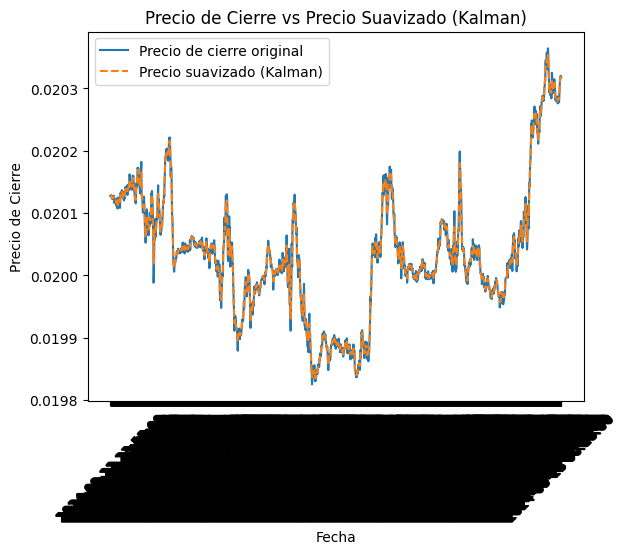

In [23]:
# Graficar los precios originales y los suavizados
plt.plot(df['date'], df['close'], label='Precio de cierre original')
plt.plot(df['date'], df['kalman_smoothed'], label='Precio suavizado (Kalman)', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Precio de Cierre vs Precio Suavizado (Kalman)')
plt.legend()
plt.xticks(rotation=45)
plt.show()